# Task2. Algorithms for unconstrained nonlinear optimization. Direct methods
Alexandra Matveeva, J4134c

In [8]:
# eps = 0.001 
# one-dimensional methods: 
#      - exhaustive search (brute-force search)
#      - dichotomy
#      - golden section search

In [117]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy

In [56]:
def cube_func(x, f_count):
    f_count += 1
    return [x ** 3, f_count]

In [93]:
def abs_func(x, f_count):
    f_count += 1
    return [math.fabs(x - 0.2), f_count]

In [82]:
def sin_func(x, f_count):
    f_count += 1
    return [x * np.sin(1/x), f_count]

In [13]:
eps = 1e-3

In [78]:
# exhaustive search method (brute-force search)
def exhaustive_method(a, b, func):
    f_count = 0
    it = 1 #number of iterations
    n = int((b - a) / eps)
    arg = a
    f_min, f_count = func(a, f_count) # k = 0
    for k in range(1, n):
        it += 1
        x = a + k * (b - a) / n
        f, f_count = func(x, f_count)
        if(f <= f_min):
            arg = x
            f_min = f
    print(f'{func}:\t ','arg = {:.3f} Minimum: {:.3f} Number of f-calculations: {:.0f} Iterations: {:.0f}'.format(arg, f_min, f_count, it))
#     print('x = ', arg)
#     print('f(x) = ', f_min)

In [86]:
# dichotomy 
def dichotomy(a, b, func):
    f_count = 0 #number of function calculations
    it = 1
    delta = eps / 2
    x1 = (a + b - delta) / 2
    x2 = (a + b + delta) / 2
    f1, f_count = func(x1, f_count)
    f2, f_count = func(x2, f_count)
    while(abs(a - b) >= eps):
        it += 1
        if(f1 <= f2):
            b = x2
        else:
            a = x1
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        f1, f_count = func(x1, f_count)
        f2, f_count = func(x2, f_count)
    x = (x1 + x2) / 2
    f_min, f_count = func(x, f_count)
    print(f'{func}:\t ','arg = {:.3f} Minimum: {:.3f} Number of f-calculations: {:.0f} Iterations: {:.0f}'.format(x, f_min, f_count, it))
#     print('x = ', x)
#     print('f(x) = ', f_min)

In [91]:
# golden section search
def goldenSection_func(a, b, func):
    f_count = 0 # number of function calculations
    it = 1 # number of iterations
    alpha1 = (3 - 5 ** 0.5) / 2
    alpha2 = (5 ** 0.5 - 3) / 2
    
    x1 = a + alpha1 * (b - a)
    x2 = b + alpha2 * (b - a)
    f_x1, f_count = func(x1, f_count)
    f_x2, f_count = func(x2, f_count)
    
    while(abs(a - b) >= eps):
        it += 1
        f_x1, f_count = func(x1, f_count)
        f_x2, f_count = func(x2, f_count)
        
        if(f_x1 <= f_x2):
            b = x2
            x2 = x1
            x1 = a + alpha1 * (b - a)
        else:
            a = x1 
            x1 = x2
            x2 = b + alpha2 * (b - a)
            
    x = (x1 + x2) / 2
    f_min, f_count = func(x, f_count)
    print(f'{func}:\t ','arg = {:.3f} Minimum: {:.3f} Number of f-calculations: {:.0f} Iterations: {:.0f}'.format(x, f_min, f_count, it))
#     print('x = ', x)
#     print('f(x) = ', f_min)

In [94]:
print('Exhaustive search (Brute-force)')
exhaustive_method(0, 1, cube_func)
exhaustive_method(0, 1, abs_func)
exhaustive_method(0.01, 1, sin_func)

print('\nDichotomy search method')
dichotomy(0, 1, cube_func)
dichotomy(0, 1, abs_func)
dichotomy(0.01, 1, sin_func)

print('\nGolden section search method')
goldenSection_func(0, 1, cube_func)
goldenSection_func(0, 1, abs_func)
goldenSection_func(0.01, 1, sin_func)

Exhaustive search (Brute-force)
<function cube_func at 0x00000225197DEAF0>:	  arg = 0.000 Minimum: 0.000 Number of f-calculations: 1000 Iterations: 1000
<function abs_func at 0x0000022519709B80>:	  arg = 0.200 Minimum: 0.000 Number of f-calculations: 1000 Iterations: 1000
<function sin_func at 0x0000022519644AF0>:	  arg = 0.223 Minimum: -0.217 Number of f-calculations: 990 Iterations: 990

Dichotomy search method
<function cube_func at 0x00000225197DEAF0>:	  arg = 0.000 Minimum: 0.000 Number of f-calculations: 25 Iterations: 12
<function abs_func at 0x0000022519709B80>:	  arg = 0.200 Minimum: 0.000 Number of f-calculations: 25 Iterations: 12
<function sin_func at 0x0000022519644AF0>:	  arg = 0.223 Minimum: -0.217 Number of f-calculations: 25 Iterations: 12

Golden section search method
<function cube_func at 0x00000225197DEAF0>:	  arg = 0.000 Minimum: 0.000 Number of f-calculations: 33 Iterations: 16
<function abs_func at 0x0000022519709B80>:	  arg = 0.200 Minimum: 0.000 Number of f-ca

In [100]:
alpha, beta = random.random(), random.random()
print(alpha, beta)

0.9419383070301395 0.9115071003220712


In [108]:
# noisy data generation
xk = []
yk = []
for k in range(101):
    x_temp = k / 100
    xk.append(x_temp)
    yk.append(alpha * x_temp + beta + np.random.normal(0, 1))

In [114]:
# linear approximation function
def linear_approx_func(x, a, b):
    return a * x + b    

In [116]:
# rational approximation function
def rational_approx_func(x, a, b):
    return a / (1 + b * x)

In [ ]:
def least_squared_linear(params, ):
    a, b = params
    return

In [ ]:
# linear optimization
linear_opt_brute = optimize.brute(least_squares_linear, ([0, 1],[0, 1]), args=(yk, xk, ))

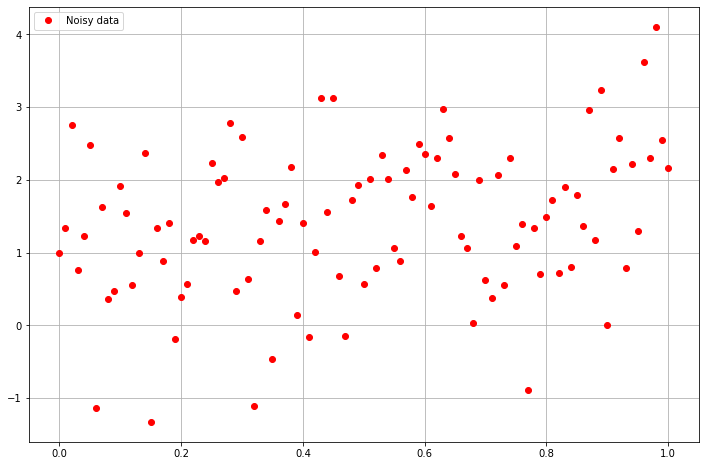

In [112]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(xk, yk, 'ro')
plt.legend(['Noisy data'])